# Rabi oscillations in rotating wave approximation

In [1]:
pip install qutip

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import python packages
import numpy as np
from scipy.linalg import expm
from scipy.constants import hbar
from sympy.physics.paulialgebra import Pauli, evaluate_pauli_product



# define the Pauli matrix sigma_x as a numpy array
sigma_x = np.array([[0, 1], [1, 0]])    # your code
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])



def rabi_hamiltonian(omega_R):
    """ Hamiltonian for Rabi oscillations with Rabi frequency omega """
    return  -0.5 * omega_R * sigma_x *hbar # your code, return the Hamiltonian in the rotating wave approximation

def initialize_qubit():
    """ Initialize the qubit (represented by a numpy array) in the |0> state """
    return np.array([1, 0], dtype=complex)  # your code, return the qubit state


In [4]:
def time_evolution(psi0, H, t):
    """ Evolve the state psi0 under Hamiltonian H for time t with the time evolution operator U"""

    U = expm(-1j * H * t/hbar) # your code
    # note that matrix exponentiation is available in the Python package scipy.linalg
    return np.dot(U, psi0) # your code, return the time-evolved state


In [5]:
def bloch_coords(psi):
    """ Convert the qubit state to Bloch sphere coordinates """
    # your code, compute the Bloch sphere coordinates x,y,z corresponding to the qubit state
    # computing the x,y and z component using the trace of the density matrix with the Pauli x,y,z matrix, all three Pauli matrices need to be defined above
    rho = np.outer(psi, np.conj(psi))
    x =  np.real(np.trace(np.dot(rho, sigma_x)))# your code
    y = np.real(np.trace(np.dot(rho, sigma_y)))
    z = np.real(np.trace(np.dot(rho, sigma_z)))
    return np.array([x, y, z])


In [6]:
# This function plots the Bloch sphere and the qubit's trajectory.
# You don't need to modify anything here.

import matplotlib.pyplot as plt
from qutip import Bloch

def plot_bloch_sphere(bloch_vectors):
    """ Plot the qubit's trajectory on the Bloch sphere """
    b = Bloch()
    b.add_points(bloch_vectors.T)
    b.show()


In [7]:
# new code for (f)
def probability_of_zero(psi):
    """ Compute the probability of measuring the qubit in the |0> state """
    return abs(psi[0])**2

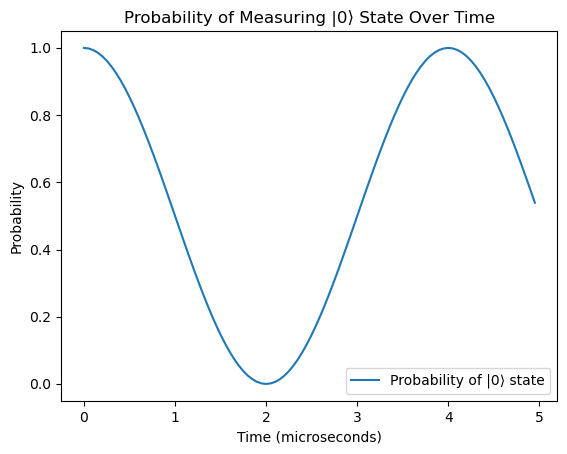

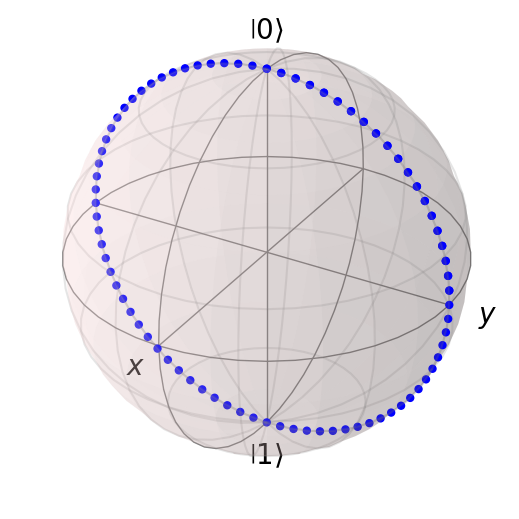

In [12]:
def main():
    # Parameter definition Rabi frequency for neutral atoms, time given in microsecond
    # Rabi frequence in unit 1/microsecond, i.e.,
    omega_R = 0.5*np.pi# your code, choose a typical Rabi frequency,
    T = 5 # your code, define the total time of the qubit simulation here
    dt = 0.05 # your code, define the time step for the simulation here
    times = np.arange(0, T, dt)

    # Initialize the qubit state psi0
    psi0 =  initialize_qubit() # your code, set the initial state of the qubit
    H = rabi_hamiltonian(omega_R) # your code, set the Hamiltonian


    # Evolve the qubit in time and collect Bloch sphere coordinates and probabilities (for (f))
    bloch_vectors = []
    probabilities = []
    for t in times:
        psi_t = time_evolution(psi0, H, t) # your code, compute the qubit state at time t
        bloch_vectors.append(bloch_coords(psi_t))
        probabilities.append(probability_of_zero(psi_t))

    bloch_vectors = np.array(bloch_vectors)

    # Plot probability of measuring |0> state
    plt.figure()
    plt.plot(times, probabilities, label='Probability of |0⟩ state')
    plt.xlabel('Time (microseconds)')
    plt.ylabel('Probability')
    plt.title('Probability of Measuring |0⟩ State Over Time')
    plt.legend()
    plt.show()

    plot_bloch_sphere(bloch_vectors) # your code, plot the Bloch sphere trajectory





if __name__ == "__main__":
    main()
